## Task 1

## Descriptive Statistics

In [2]:
import pandas as pd
import numpy as np

# Read data (make sure the CSV is in the ./data folder)
df = pd.read_csv('data/raw_analyst_ratings.csv')

# Peek at the data
df.head(10)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [3]:
# Compute the length of each headline (number of characters)
df['headline_length'] = df['headline'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Basic descriptive stats
desc_length = df['headline_length'].describe()
print(desc_length)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [4]:
publisher_counts = df['publisher'].value_counts()

# Display top 10 most active publishers
print(publisher_counts.head(10))


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [5]:
publisher_counts = df['stock'].value_counts()

# Display top 10 most active publishers
print(publisher_counts.head(10))


stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64


In [6]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')

# If you want to drop rows that fail to parse:
df = df.dropna(subset=['date'])

df.info()


C:\Users\btulu\AppData\Local\Temp\ipykernel_23212\4053844955.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 55987 entries, 0 to 1407270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   Unnamed: 0       55987 non-null  int64                    
 1   headline         55987 non-null  object                   
 2   url              55987 non-null  object                   
 3   publisher        55987 non-null  object                   
 4   date             55987 non-null  datetime64[ns, UTC-04:00]
 5   stock            55987 non-null  object                   
 6   headline_length  55987 non-null  int64                    
dtypes: datetime64[ns, UTC-04:00](1), int64(2), object(4)
memory usage: 3.4+ MB


In [7]:
# Count how many articles published on each unique date (year-month-day)
# This extracts the "date only" portion (YYYY-MM-DD)
df['publication_date'] = df['date'].dt.date

date_counts = df.groupby('publication_date').size().reset_index(name='article_count')
print(date_counts.head(10))


  publication_date  article_count
0       2011-04-27              1
1       2011-04-28              2
2       2011-04-29              2
3       2011-04-30              1
4       2011-05-01              1
5       2011-05-02              9
6       2011-05-03              3
7       2011-05-05              3
8       2011-05-06              3
9       2011-05-07              2


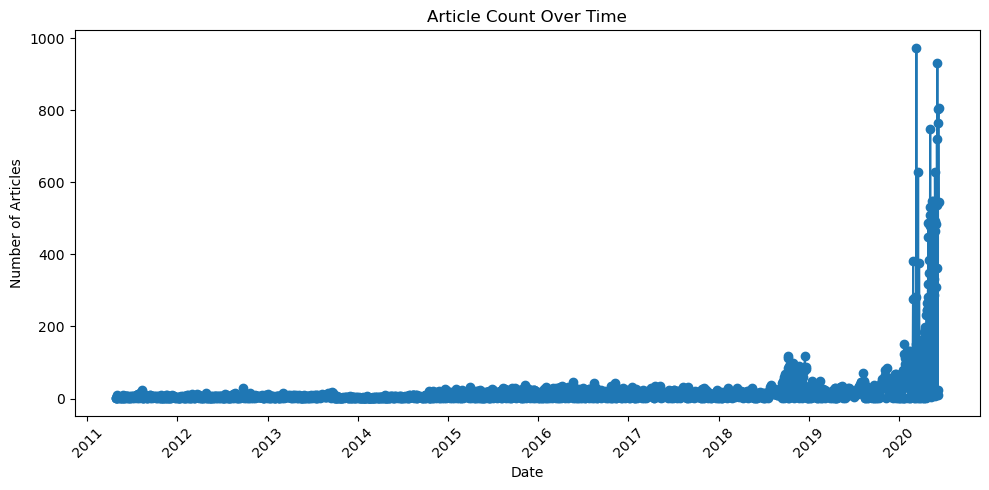

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(date_counts['publication_date'], date_counts['article_count'], marker='o')
plt.xticks(rotation=45)
plt.title('Article Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


In [9]:
# Extract the day name (Monday, Tuesday, etc.)
df['day_of_week'] = df['date'].dt.day_name()

day_counts = df['day_of_week'].value_counts()
print(day_counts)


day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


## Text Analysis(Topic Modeling):

In [3]:
import pandas as pd
import re, string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [6]:
###############################################################################
# Configuration
###############################################################################
CSV_PATH     = "data/raw_analyst_ratings.csv"
N_TOPICS     = 6        # try 5–10
TOP_WORDS    = 10       # words/phrases to show per topic
BIGRAMS_ONLY = False    # True = only keep bigrams (e.g. "price_target")

###############################################################################
# Helper: minimal text cleaning
###############################################################################
nltk.download("stopwords", quiet=True)
STOPWORDS = set(stopwords.words("english"))

In [7]:

def clean(text: str) -> str:
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)           # strip URLs
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = [t for t in text.split() if t not in STOPWORDS and len(t) > 2]
    return " ".join(tokens)

###############################################################################
# 1. Load + preprocess headlines
###############################################################################
df = pd.read_csv(CSV_PATH)
df["clean"] = df["headline"].astype(str).map(clean)

###############################################################################
# 2. TF-IDF vectorisation (include bigrams to capture phrases)
###############################################################################
ngram_range = (2, 2) if BIGRAMS_ONLY else (1, 2)        # unigrams+-bigrams
tfidf = TfidfVectorizer(
    max_df=0.6, min_df=2,
    ngram_range=ngram_range,
    norm="l2",            # cosine length-normalised
)

X = tfidf.fit_transform(df["clean"])


In [8]:

###############################################################################
# 3. Fit NMF
###############################################################################
nmf = NMF(
    n_components=N_TOPICS,
    init="nndsvd",
    random_state=42,
    max_iter=400,
)
W = nmf.fit_transform(X)    # document-topic matrix (unused here)
H = nmf.components_         # topic-term matrix

terms = tfidf.get_feature_names_out()

###############################################################################
# 4. Display topics
###############################################################################
print(f"\n=== Top {TOP_WORDS} words/phrases for each of {N_TOPICS} topics ===")
for topic_idx, row in enumerate(H):
    best = row.argsort()[::-1][:TOP_WORDS]
    words = " | ".join(terms[i] for i in best)
    print(f"Topic {topic_idx+1}: {words}")



=== Top 10 words/phrases for each of 6 topics ===
Topic 1: stocks moving | moving | session | stocks | premarket session | premarket | midday session | midday | moving wednesdays | moving thursdays
Topic 2: benzingas top | benzingas | top | top upgrades | upgrades | downgrades | upgrades downgrades | top downgrades | top premarket | top initiations
Topic 3: biggest movers | biggest | movers | movers yesterday | yesterday | movers friday | friday | biggest midday | midday | biggest price
Topic 4: 52week | hit 52week | stocks hit | hit | stocks | 52week highs | highs | 52week lows | lows | thursday
Topic 5: earnings scheduled | scheduled | earnings | scheduled february | february | scheduled may | scheduled august | 2019 | may | 2016
Topic 6: stocks set | set new | new 52week | set | new | 52week | yesterday | stocks | 52week low | low


## Time Series Analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
###############################################################################
# 1. Config
###############################################################################
CSV_PATH       = Path("data/raw_analyst_ratings.csv")
SPIKE_ZTHRESH  = 2.5          # z-score threshold to flag a spike
ROLLING_WINDOW = 7            # days for rolling mean / std


In [4]:
###############################################################################
# 2. Load + parse datetime
###############################################################################
df = pd.read_csv(CSV_PATH)
# Robust parsing – handles “2020-06-05 10:30:54-04:00” AND “5/22/2020 0:00”
df["date"] = pd.to_datetime(df["date"], errors="coerce", infer_datetime_format=True)
df = df.dropna(subset=["date"])

###############################################################################
# 3. Daily publication frequency
###############################################################################
df["pub_date"] = df["date"].dt.normalize()          # midnight-anchored date
daily_counts   = df.groupby("pub_date").size().rename("cnt").to_frame()

# Rolling stats
daily_counts["mean"] = daily_counts["cnt"].rolling(ROLLING_WINDOW, min_periods=1).mean()
daily_counts["std"]  = daily_counts["cnt"].rolling(ROLLING_WINDOW, min_periods=1).std(ddof=0)
daily_counts["z"]    = (daily_counts["cnt"] - daily_counts["mean"]) / daily_counts["std"]

# Detect spikes
spikes = daily_counts[daily_counts["z"] >= SPIKE_ZTHRESH].sort_values("cnt", ascending=False)


C:\Users\btulu\AppData\Local\Temp\ipykernel_6712\3285954414.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date"] = pd.to_datetime(df["date"], errors="coerce", infer_datetime_format=True)


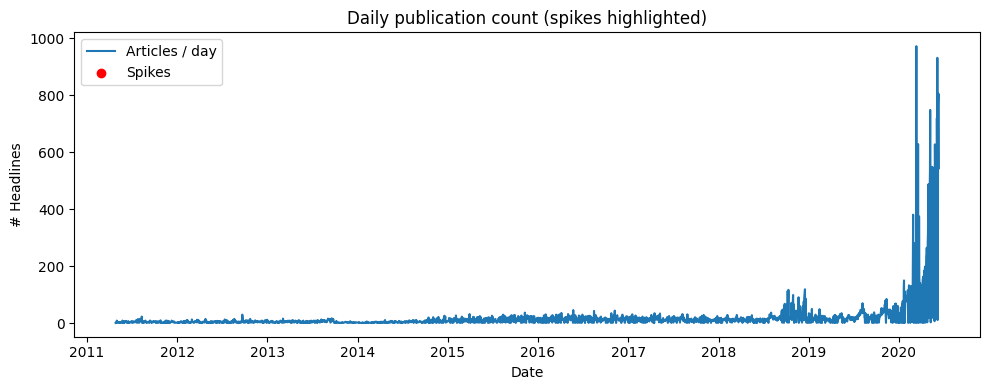

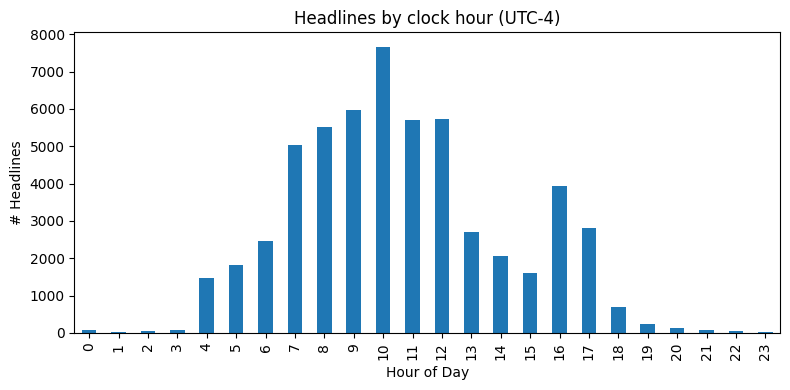

In [5]:
###############################################################################
# 4. Intraday publication pattern (hour of day, UTC-4)
###############################################################################
df["hour"] = df["date"].dt.hour
hour_counts = df["hour"].value_counts().sort_index()

###############################################################################
# 5. ── Plotting ──────────────────────────────────────────────────────────────
###############################################################################
plt.figure(figsize=(10, 4))
plt.plot(daily_counts.index, daily_counts["cnt"], label="Articles / day")
plt.scatter(spikes.index, spikes["cnt"], color="red", zorder=5, label="Spikes")
plt.title("Daily publication count (spikes highlighted)")
plt.xlabel("Date")
plt.ylabel("# Headlines")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
hour_counts.plot(kind="bar")
plt.title("Headlines by clock hour (UTC-4)")
plt.xlabel("Hour of Day")
plt.ylabel("# Headlines")
plt.tight_layout()
plt.show()

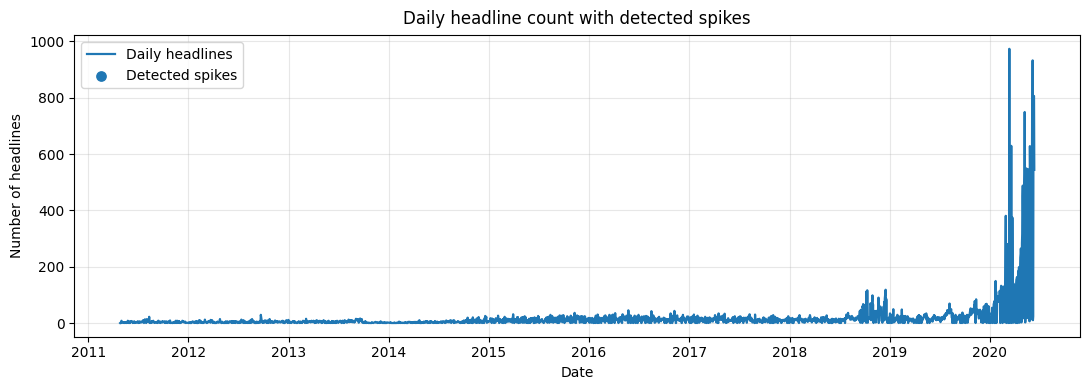

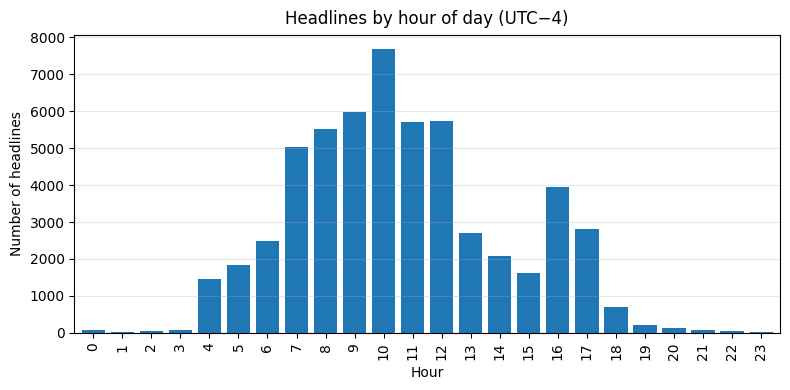

In [9]:
###############################################################################
# 5. ── Plotting (improved) ───────────────────────────────────────────────────
###############################################################################
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# ── Figure 1 – daily headline count with spikes ──────────────────────────────
fig1, ax1 = plt.subplots(figsize=(11, 4))

# line for daily totals
ax1.plot(daily_counts.index, daily_counts["cnt"],
         linewidth=1.6, label="Daily headlines")

# scatter overlay for spikes
ax1.scatter(spikes.index, spikes["cnt"],
            marker="o", s=45, label="Detected spikes", zorder=5)

# nicer x-axis date labels
loc = mdates.AutoDateLocator(minticks=6, maxticks=12)
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))

ax1.set_title("Daily headline count with detected spikes", pad=8)
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of headlines")
ax1.grid(alpha=0.3)
ax1.legend()
fig1.tight_layout()

# ── Figure 2 – intraday distribution (hour-of-day) ──────────────────────────
fig2, ax2 = plt.subplots(figsize=(8, 4))

hour_counts.sort_index().plot(kind="bar", ax=ax2, width=0.8)

ax2.set_title("Headlines by hour of day (UTC−4)", pad=8)
ax2.set_xlabel("Hour")
ax2.set_ylabel("Number of headlines")
ax2.grid(axis="y", alpha=0.3)
fig2.tight_layout()

plt.show()


In [6]:
###############################################################################
# 6. Console-print key findings
###############################################################################
print("\nTop publication-spike days (z ≥ {:.1f}):".format(SPIKE_ZTHRESH))
print(spikes[["cnt"]].head(10))

peak_hour = hour_counts.idxmax()
print(f"\nMost common release time: **{peak_hour}:00–{peak_hour}:59** "
      f"with {hour_counts.max()} headlines.")


Top publication-spike days (z ≥ 2.5):
Empty DataFrame
Columns: [cnt]
Index: []

Most common release time: **10:00–10:59** with 7669 headlines.


## Publisher Analysis:

In [10]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

###############################################################################
# Config
###############################################################################
CSV_PATH          = Path("data/raw_analyst_ratings.csv")
TOP_N_PUBLISHERS  = 10
TOP_N_DOMAINS     = 10

In [11]:
###############################################################################
# Helpers
###############################################################################
def clean_pub(name: str) -> str:
    """Lower-case, trim, collapse spaces"""
    return " ".join(str(name).lower().split())

def extract_domain(name: str):
    """Return email domain if publisher string is an address, else None"""
    if "@" in str(name):
        return name.split("@")[-1].lower()
    return None

# Very simple keyword rules – tweak/extend as needed
ANALYST_PAT   = re.compile(r"\bprice target|downgrade|upgrade|maintains|raises|lowers", re.I)
EARNINGS_PAT  = re.compile(r"\bearnings|eps\b|revenue|sales results|q\d", re.I)
REGUL_PAT     = re.compile(r"\bfda|approval|acquisition|merger|sec filing", re.I)
MOVE_PAT      = re.compile(r"\btrading higher|trading lower|gainers|losers|moving", re.I)


In [12]:
def bucket_headline(headline: str) -> str:
    text = str(headline).lower()
    if ANALYST_PAT.search(text):
        return "Analyst Rating"
    if EARNINGS_PAT.search(text):
        return "Earnings"
    if REGUL_PAT.search(text):
        return "Regulatory / M&A"
    if MOVE_PAT.search(text):
        return "Stock Movement"
    return "Other"

In [13]:
###############################################################################
# 0. Load
###############################################################################
df = pd.read_csv(CSV_PATH)

###############################################################################
# 1. Clean publisher names & domains
###############################################################################
df["publisher_clean"] = df["publisher"].map(clean_pub)
df["email_domain"]    = df["publisher"].map(extract_domain)

###############################################################################
# 2. Headline-type bucket
###############################################################################
df["news_type"] = df["headline"].map(bucket_headline)

###############################################################################
# 3. Top publishers
###############################################################################
pub_counts = df["publisher_clean"].value_counts().head(TOP_N_PUBLISHERS)
print("\nTop publishers (article counts):\n", pub_counts, "\n")



Top publishers (article counts):
 publisher_clean
paul quintaro        228373
lisa levin           186979
benzinga newsdesk    154737
charles gross         96732
monica gerson         82380
eddie staley          57254
hal lindon            49047
etf professor         28489
juan lopez            28438
benzinga staff        28114
Name: count, dtype: int64 



In [14]:
###############################################################################
# 4. Top email domains
###############################################################################
dom_counts = (
    df["email_domain"]
    .dropna()
    .value_counts()
    .head(TOP_N_DOMAINS)
)
print("Top email domains (article counts):\n", dom_counts, "\n")

###############################################################################
# 5. Publisher vs. news-type cross-tab (top N only)
###############################################################################
top_pubs = pub_counts.index.tolist()
pivot = (
    df[df["publisher_clean"].isin(top_pubs)]
    .pivot_table(index="publisher_clean", columns="news_type",
                 values="headline", aggfunc="count", fill_value=0)
    .loc[top_pubs]           # preserve ordering
)

print("News-type distribution for top publishers:\n")
print(pivot)

Top email domains (article counts):
 email_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64 

News-type distribution for top publishers:

news_type          Analyst Rating  Earnings   Other  Regulatory / M&A  \
publisher_clean                                                         
paul quintaro               36035     65605  119828              5710   
lisa levin                  26490     28909   84048              1451   
benzinga newsdesk            7648     35973   77233              3515   
charles gross                1491     11919   79626              3385   
monica gerson                9998     25926   38258               176   
eddie staley                13674     10966   30346              1754   
hal lindon                   4699     12030   

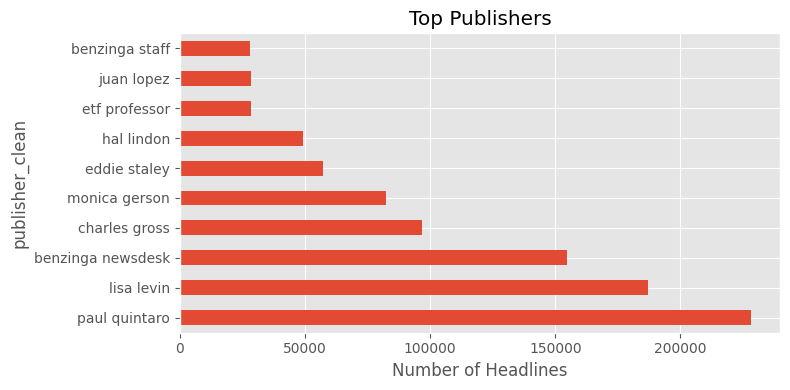

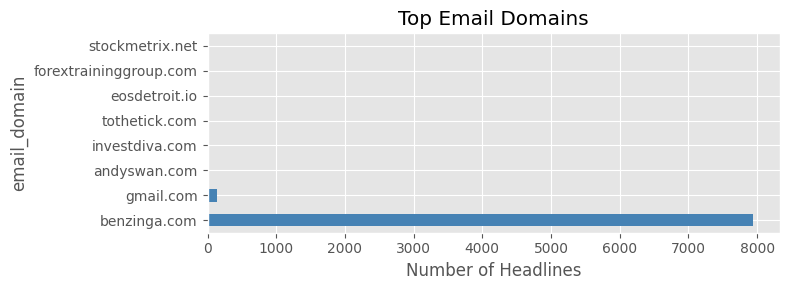

In [15]:
###############################################################################
# 6. Plots ────────────────────────────────────────────────────────────────────
###############################################################################
plt.style.use("ggplot")

# 6a. Publisher counts
pub_counts.plot(kind="barh", figsize=(8, 4), title="Top Publishers")
plt.xlabel("Number of Headlines")
plt.tight_layout()
plt.show()

# 6b. Email domain counts
if not dom_counts.empty:
    dom_counts.plot(kind="barh", figsize=(8, 3), color="steelblue",
                    title="Top Email Domains")
    plt.xlabel("Number of Headlines")
    plt.tight_layout()
    plt.show()